In [263]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = -0.5
b = 0.5
N = 1000
L = b - a
h = L / N
x = a + h * np.arange(1, N + 1)

# Functions
sig = .1

def f(x):
    return (1 / (sig * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x / sig) ** 2)

def d2_f(x):
    return (1 / (sig ** 5 * np.sqrt(2 * np.pi))) * (x ** 2 - sig ** 2) * np.exp(-0.5 * (x / sig) ** 2)

# Frequency domain variables
kk = np.fft.fftfreq(N, d=h) * N
kk2 = np.fft.fftfreq(N, d=h) * N

ik = (2 * np.pi / L) * 1j * kk
ik2 = (2 * np.pi / L) * 1j * kk2

# Compute derivatives using FFT
d_xx_fft_1 = np.fft.ifft((ik ** 2) * np.fft.fft(f(x))).real*h**2
d_xx_fft_2 = np.fft.ifft((ik2 ** 2) * np.fft.fft(f(x))).real*h**2
d_xx_exact = d2_f(x)



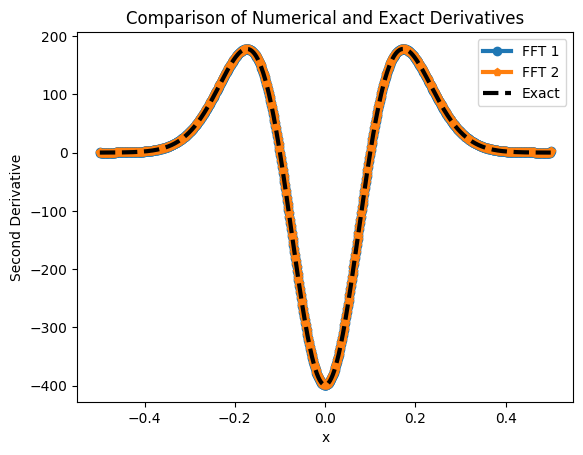

In [264]:
# Plot results
plt.plot(x, d_xx_fft_1, '-o', linewidth=3, label='FFT 1')
plt.plot(x, d_xx_fft_2, '-p', linewidth=3, label='FFT 2')
plt.plot(x, d_xx_exact, '--k', linewidth=3, label='Exact')
plt.legend()
plt.xlabel("x")
plt.ylabel("Second Derivative")
plt.title("Comparison of Numerical and Exact Derivatives")
plt.show()


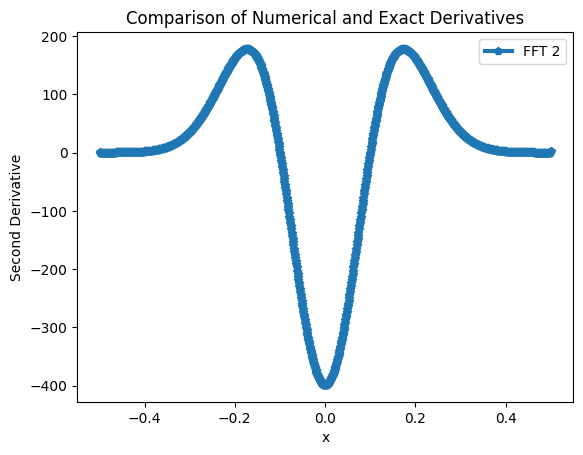

In [265]:
# Plot results
# plt.plot(x, d_xx_fft_1, '-o', linewidth=3, label='FFT 1')
plt.plot(x, d_xx_fft_2, '-p', linewidth=3, label='FFT 2')
# plt.plot(x, d_xx_exact, '--k', linewidth=3, label='Exact')
plt.legend()
plt.xlabel("x")
plt.ylabel("Second Derivative")
plt.title("Comparison of Numerical and Exact Derivatives")
plt.show()


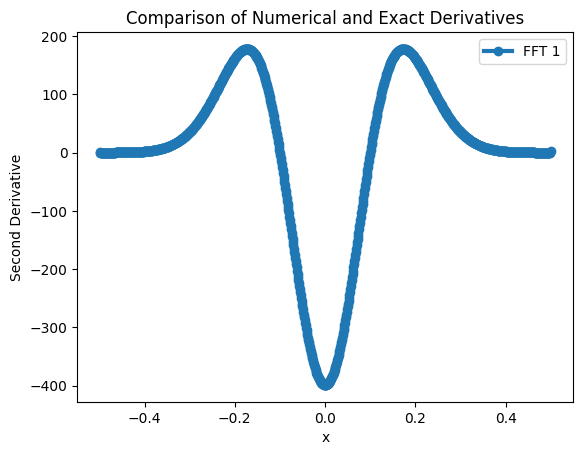

In [266]:
# Plot results
plt.plot(x, d_xx_fft_1, '-o', linewidth=3, label='FFT 1')
# plt.plot(x, d_xx_fft_2, '-p', linewidth=3, label='FFT 2')
# plt.plot(x, d_xx_exact, '--k', linewidth=3, label='Exact')
plt.legend()
plt.xlabel("x")
plt.ylabel("Second Derivative")
plt.title("Comparison of Numerical and Exact Derivatives")
plt.show()


In [267]:
np.mean((d_xx_fft_2 - d_xx_exact)**2/(d_xx_fft_2**2))

0.024339235796675483

In [55]:
import numpy as np
import matplotlib.pyplot as plt
# nn = np.power(10,[0+.2*j for j in range(20)])
q = 20
p = 40
nn = np.linspace(2,q,p)//1
nn = [4+4*i for i in range(50)]
nn = [int(nn[i]) for i in range(len(nn))]
lsx = list()
lsx1 = list()
lsxx  = list()
lsxx1 = list()
for N in nn:
    # Parameters
    a = -0.5
    b = 0.5
    # N = 100
    L = b - a
    h = L / N
    x = a + h * np.arange(1, N + 1)

    # Functions
    sig = .01

    def f(x):
        return (1 / (sig * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x / sig) ** 2)
    def d_f(x):
        return -x / (sig**2) * f(x)
    def d2_f(x):
        return (1 / (sig ** 5 * np.sqrt(2 * np.pi))) * (x ** 2 - sig ** 2) * np.exp(-0.5 * (x / sig) ** 2)

    # Frequency domain variables
    kk = np.fft.fftfreq(N, d=h) * N
    kk2 = np.fft.fftfreq(N, d=h) * N

    kk = np.concatenate((np.arange(0, N//2), [0], np.arange(-N//2 + 1, 0))).reshape(-1, 1)

    # Equivalent to MATLAB's kk2
    kk2 = np.concatenate((np.arange(0, N//2 + 1), np.arange(-N//2 + 1, 0))).reshape(-1, 1)


    ik = (2 * np.pi / L) * 1j * kk
    ik2 = (2 * np.pi / L) * 1j * kk2
    ik = ((2 * np.pi) / L) * 1j * kk
    ik2 = ((2 * np.pi) / L) * 1j * kk2
    # Compute derivatives using FFT
    d_xx_fft_1 = np.fft.ifft((ik ** 2) * np.fft.fft(f(x))).real/N**2
    d_xx_fft_2 = np.fft.ifft((ik2 ** 2) * np.fft.fft(f(x))).real/N**2
    
    kk = np.concatenate((np.arange(0, N//2), [0], np.arange(-N//2 + 1, 0))).reshape(-1, 1)
    kk2 = np.concatenate((np.arange(0, N//2 + 1), np.arange(-N//2 + 1, 0))).reshape(-1, 1)
    
    # Compute ik and ik2
    ik = ((2 * np.pi) / L) * 1j * kk
    ik2 = ((2 * np.pi) / L) * 1j * kk2
    
    # Compute second derivatives using FFT
    f_values = f(x)  # Evaluate f(x) on the grid
    fft_f = np.fft.fft(f_values)  # Compute FFT of f(x)
    
    # Compute second derivatives
    d_xx_fft_1 = np.fft.ifft((ik**2).flatten() * fft_f).real # Second derivative using ik
    d_xx_fft_2 = np.fft.ifft((ik2**2).flatten() * fft_f).real  # Second derivative using ik2

    d_x_fft_1 = np.fft.ifft((ik).flatten() * np.fft.fft(f(x))).real  # Second derivative using ik
    d_x_fft_2 = np.fft.ifft((ik2).flatten() * np.fft.fft(f(x))).real  # Second derivative using ik2

    
    d_xx_exact = d2_f(x)
    d_x_exact = d_f(x)
    print(x)
    print(d_x_exact)
    print(d_x_fft_1)
    print(d_x_exact - d_x_fft_1)
    print(np.sum(( d_x_exact-d_x_fft_2)**2))
    lsxx.append(np.mean(np.sum(( d_xx_exact-d_xx_fft_2)**2) /np.sum((d_xx_exact**2))))
    lsxx1.append(np.mean(np.sum(( d_xx_exact-d_xx_fft_1)**2)/np.sum((d_xx_exact**2))))
    
    lsx.append(np.mean(np.max(np.abs( d_x_exact-d_x_fft_2))))# /np.sum(((d_x_exact)**2))
    lsx1.append(np.mean(np.max(np.abs( d_x_exact-d_x_fft_1))))#/np.sum(((d_x_exact)**2))
print(np.sum(( d_x_exact-d_x_fft_2)**2))


[-0.25  0.    0.25  0.5 ]
[ 1.91348243e-131 -0.00000000e+000 -1.91348243e-131 -0.00000000e+000]
[ 125.33141373    0.         -125.33141373    0.        ]
[-125.33141373   -0.          125.33141373   -0.        ]
31415.926535897943
[-0.375 -0.25  -0.125  0.     0.125  0.25   0.375  0.5  ]
[ 6.48087650e-301  1.91348243e-131  5.86899420e-030 -0.00000000e+000
 -5.86899420e-030 -1.91348243e-131 -6.48087650e-301 -0.00000000e+000]
[  51.91397136 -125.33141373  302.57679882    0.         -302.57679882
  125.33141373  -51.91397136    0.        ]
[ -51.91397136  125.33141373 -302.57679882   -0.          302.57679882
 -125.33141373   51.91397136   -0.        ]
219911.48575128557
[-0.41666667 -0.33333333 -0.25       -0.16666667 -0.08333333  0.
  0.08333333  0.16666667  0.25        0.33333333  0.41666667  0.5       ]
[ 0.00000000e+000  7.06442213e-237  1.91348243e-131  3.19213150e-056
  2.76731954e-011 -0.00000000e+000 -2.76731954e-011 -3.19213150e-056
 -1.91348243e-131 -7.06442213e-237 -0.00000000

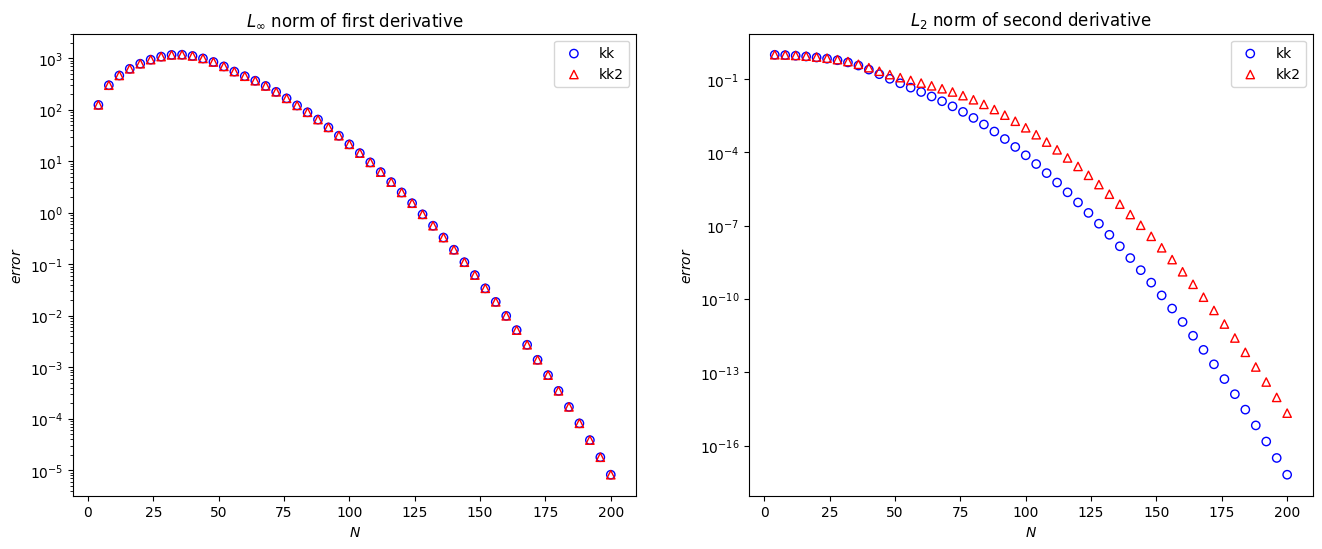

In [58]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (16,6))


ax1.scatter(nn,lsx,marker = 'o',facecolor='none' , edgecolors= 'blue',label = 'kk')
ax1.scatter(nn,lsx1,marker = '^',facecolor='none', edgecolors= 'red',label = 'kk2')
ax1.set_yscale('log')
ax1.set_xlabel(r'$N$')
ax1.set_ylabel(r'$error$')
ax1.set_title(r'$L_{\infty}$ norm of first derivative')
ax1.legend()

ax2.scatter(nn,lsxx,marker = 'o',facecolor='none' , edgecolors= 'blue',label = 'kk')
ax2.scatter(nn,lsxx1,marker = '^',facecolor='none', edgecolors= 'red',label = 'kk2')
ax2.set_yscale('log')
ax2.set_xlabel(r'$N$')
ax2.set_ylabel(r'$error$')
ax2.set_title(r'$L_2$ norm of second derivative')

ax2.legend()
# ax.set_yscale('log')

## DST

### Working Code

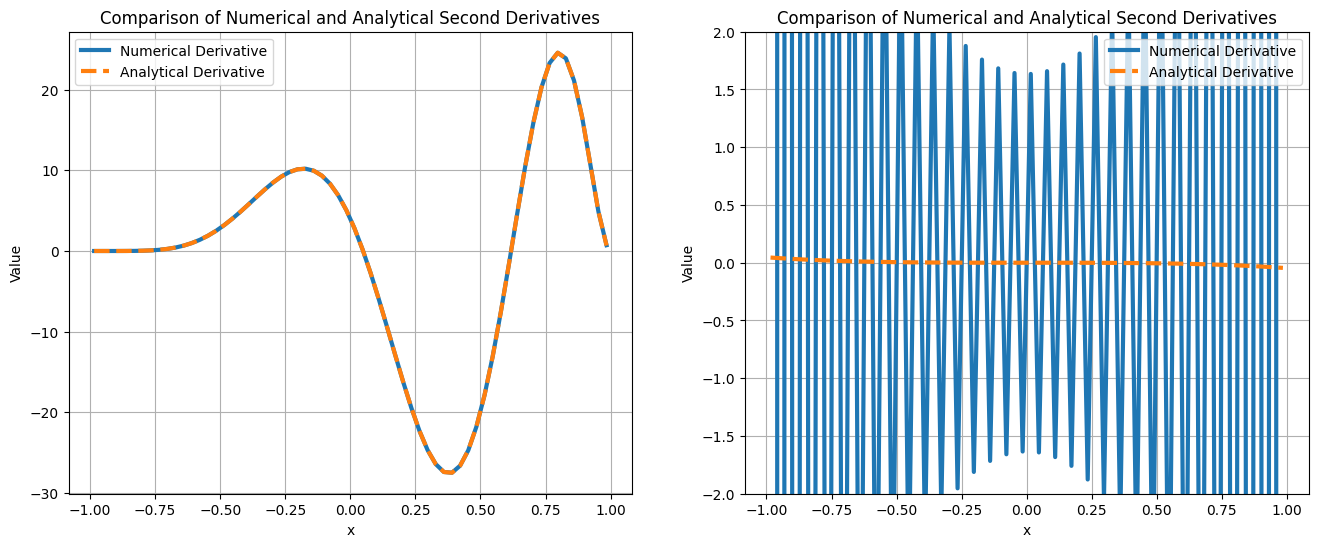

In [270]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dst, idst

# Parameters for f_1
# a_1 = -np.pi
# b_1 = np.pi
a_1 = -1
b_1 = 1
# Parameters for f_2 (commented in the MATLAB code)
# a_2 = 0
# b_2 = np.pi

# General parameters
N = 64
L_1 = b_1 - a_1
h_1 = L_1 / N
x_1 = a_1 + h_1 * (np.arange(N)) + h_1 / 2
k = np.arange(1, N + 1) * np.pi / L_1

# Function definitions
f_1 = lambda x: ((x - L_1 / 2) ** 4) * ((x + L_1 / 2) ** 8)
d2_f_1 = lambda x: (1 / 256) * (L_1 - 2 * x) ** 2 * (L_1 + 2 * x) ** 6 * (L_1**2 - 44 * L_1 * x + 132 * x**2)

# f_2 (commented in the MATLAB code)
f_2 = lambda x: np.sin(x) / (2 + np.cos(x))
d2_f_2 = lambda x: (
    np.sin(x) * (np.cos(x) / (2 + np.cos(x))**2 + (2 * np.sin(x)**2) / (2 + np.cos(x))**3)
    - np.sin(x) / (2 + np.cos(x))
    + (2 * np.sin(x) * np.cos(x)) / (2 + np.cos(x))**2
)

# Discrete sine transform (DST) and its inverse
dstn = lambda f: dst(f, type=2, norm='ortho')
idstn = lambda f: idst(f, type=2, norm='ortho')




fig,(ax1,ax2) = plt.subplots(1,2,figsize = (16,6))

# Compute numerical second derivative using DST and plot
numerical_derivative_1 = idstn(-k**2 * dstn(f_1(x_1)))

ax1.plot(x_1, numerical_derivative_1, '-', linewidth=3, label='Numerical Derivative')

numerical_derivative_2 = idstn(-k**2 * dstn(f_2(x_1)))
ax2.plot(x_1, numerical_derivative_2, '-', linewidth=3, label='Numerical Derivative')

# Plot the analytical second derivative
ax1.plot(x_1, d2_f_1(x_1), '--', linewidth=3, label='Analytical Derivative')
ax2.plot(x_1, d2_f_2(x_1), '--', linewidth=3, label='Analytical Derivative')

# Display the plot
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('Value')
ax1.set_title('Comparison of Numerical and Analytical Second Derivatives')
ax1.grid(True)
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('Value')
ax2.set_title('Comparison of Numerical and Analytical Second Derivatives')
ax2.set_ylim(-2,2)
ax2.grid(True)


### Loop

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dst, idst

# Parameters for f_1
a_1 = -np.pi
b_1 = np.pi

# Parameters for f_2 (commented in the MATLAB code)
a_2 = 0
b_2 = np.pi

# General parameters
N = 64
error_1 = list()
error_2 = list()
nn = np.linspace(2,q,p)//1
nn = [2+2*i for i in range(50)]
nn = [int(nn[i]) for i in range(len(nn))]
for N in nn:
    L_1 = b_1 - a_1
    h_1 = L_1 / N
    x_1 = a_1 + h_1 * (np.arange(N)) + h_1 / 2
    k_1= np.arange(1, N + 1) * np.pi / L_1
    
    L_2 = b_2 - a_2
    h_2 = L_2 / N
    x_2 = a_2 + h_2 * (np.arange(N)) + h_2 / 2
    k_2= np.arange(1, N + 1) * np.pi / L_2

    # Function definitions
    f_1 = lambda x: ((x - L_1 / 2) ** 4) * ((x + L_1 / 2) ** 8)
    d2_f_1 = lambda x: (1 / 256) * (L_1 - 2 * x) ** 2 * (L_1 + 2 * x) ** 6 * (L_1**2 - 44 * L_1 * x + 132 * x**2)

    # f_2 (commented in the MATLAB code)
    f_2 = lambda x: np.sin(x) / (2 + np.cos(x))
    d2_f_2 = lambda x: (
        np.sin(x) * (np.cos(x) / (2 + np.cos(x))**2 + (2 * np.sin(x)**2) / (2 + np.cos(x))**3)
        - np.sin(x) / (2 + np.cos(x))
        + (2 * np.sin(x) * np.cos(x)) / (2 + np.cos(x))**2
    )

    # Discrete sine transform (DST) and its inverse
    dstn = lambda f: dst(f, type=2, norm='ortho')
    idstn = lambda f: idst(f, type=2, norm='ortho')

    # Compute numerical second derivative using DST and plot
    numerical_derivative_1 = idstn(-k_1**2 * dstn(f_1(x_1)))
    numerical_derivative_2 = idstn(-k_2**2 * dstn(f_2(x_2)))
    exact_derivative_1 = d2_f_1(x_1)
    exact_derivative_2 = d2_f_2(x_2)
    
    error_1.append(np.sum((  numerical_derivative_1-exact_derivative_1 )**2)/np.sum((exact_derivative_1**2)))
    error_2.append(np.sum((  numerical_derivative_2-exact_derivative_2 )**2)/np.sum((exact_derivative_2**2)))

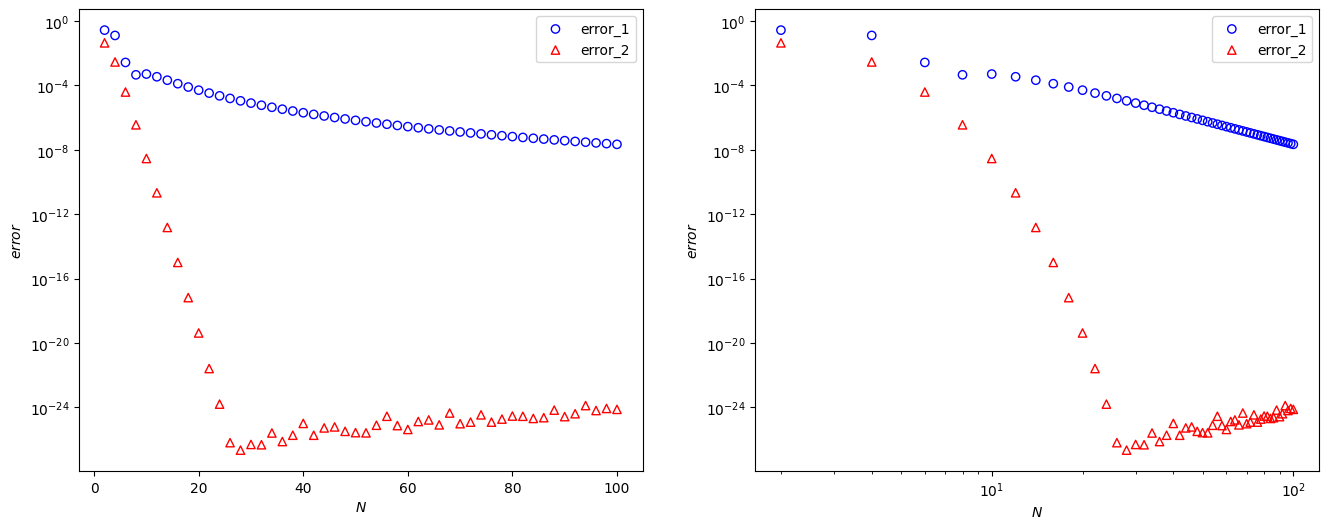

In [272]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (16,6))

ax1.scatter(nn,error_1,marker = 'o',facecolor='none' , edgecolors= 'blue',label = 'error_1')
ax1.scatter(nn,error_2,marker = '^',facecolor='none', edgecolors= 'red',label = 'error_2')
ax1.set_yscale('log')
ax1.set_xlabel(r'$N$')
ax1.set_ylabel(r'$error$')
ax1.legend()


ax2.scatter(nn,error_1,marker = 'o',facecolor='none' , edgecolors= 'blue',label = 'error_1')
ax2.scatter(nn,error_2,marker = '^',facecolor='none', edgecolors= 'red',label = 'error_2')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$N$')
ax2.set_ylabel(r'$error$')
ax2.legend()


In [273]:
import sounddevice as sd

In [274]:
f_1 = 140
dt = .00001
tmax = 1

In [275]:
# Parameters
a = -1
b = 1
N = 64
L = b - a
h = L / N
x = a + h * np.arange(1, N + 1)
k = np.arange(1, N + 1) * np.pi / L
lam =  (f_1*k*np.pi*2)**2
Hv_final = list()
Hbe_final = list()
Hfe_final = list()
# Functions

def h0(x):
    return (np.exp(-100*x**2))

# Frequency domain variables
kk = np.fft.fftfreq(N, d=h) * N
kk2 = np.fft.fftfreq(N, d=h) * N


dstn = lambda f: dst(f, type=2, norm='ortho')
idstn = lambda f: idst(f, type=2, norm='ortho')
# Compute numerical second derivative using DST and plot

Av_k = dstn(h0(x))
Abe_k = dstn(h0(x))
Afe_k = dstn(h0(x))

Vv_k = 0 * Av_k
Vbe_k =  0 * Abe_k
Vfe_k =  0 * Afe_k

tt = np.linspace(0,tmax,int(tmax//dt))
for i in range(int(tmax//dt)):
    Vv_k = -1*lam * Av_k*dt+ Vv_k
    Av_k += Vv_k*dt
    Abe_temp = Abe_k
    Afe_temp = Afe_k
    Vfe_k += dt*-lam*Afe_temp
    Afe_k += dt*Vfe_k

    Abe_k = (Abe_k + dt*Vbe_k)/(1+dt**2*lam)
    Vbe_k = -1*lam * Abe_k*dt+ Vbe_k

    # raise Exception()
    # Abe_k = np.linalg.solve(np.eye(len(Abe_k)) + dt**2*np.diag(lam), dt* Vbe_k + Abe_k)
    # Vbe_k = np.linalg.solve(np.eye(len(Abe_temp)) + dt**2*np.diag(lam), Vbe_k - lam*dt*Abe_temp)

    # Hn = np.sum(idstn(Av_k*np.sin(k*np.pi*(x/L))))
    Hvn = idstn(Av_k)
    Hben = idstn(Abe_k)
    Hfen = idstn(Afe_k)

    Hv_final.append(Hvn[40])
    Hbe_final.append(Hben[40])
    Hfe_final.append(Hfen[40])

    
    Abe_k 



In [276]:
Tfinal = 1  # Total duration in seconds
# Compute the sampling rate
Samp_rate = len(Hv_final) / Tfinal

# Play the sound with automatic scaling (normalize the signal)
sd.play(Hv_final , samplerate=int(Samp_rate))
sd.wait()

Tfinal = 1  # Total duration in seconds
# Compute the sampling rate
Samp_rate = len(Hfe_final) / Tfinal

# Play the sound with automatic scaling (normalize the signal)
sd.play(Hfe_final , samplerate=int(Samp_rate))
sd.wait()

Tfinal = 1  # Total duration in seconds
# Compute the sampling rate
Samp_rate = len(Hbe_final) / Tfinal

# Play the sound with automatic scaling (normalize the signal)
sd.play(Hbe_final , samplerate=int(Samp_rate))
sd.wait()

Text(0.5, 1.0, 'Backward Euler')

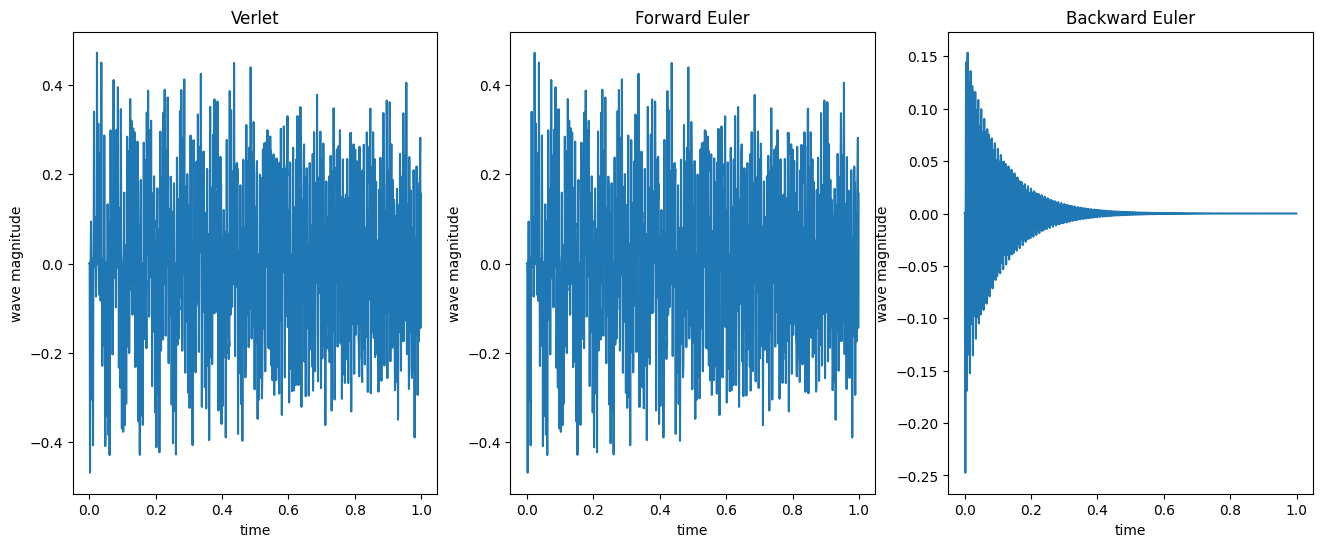

In [277]:
fig,(ax1,ax2,ax3)  = plt.subplots(1,3,figsize = (16,6))

tt = np.array(tt)
hfels = np.array(Hfe_final)
hbels = np.array(Hbe_final)
hfels = np.array(Hfe_final)

filt = [i%100 == 0 for i in range(len(tt))]
ax1.plot(tt[filt],hfels[filt])
ax2.plot(tt[filt],hfels[filt])
ax3.plot(tt[filt],hbels[filt])
ax1.set_xlabel('time')
ax1.set_ylabel('wave magnitude')
ax1.set_title('Verlet')
ax2.set_xlabel('time')
ax2.set_ylabel('wave magnitude')
ax2.set_title('Forward Euler')

ax3.set_xlabel('time')
ax3.set_ylabel('wave magnitude')
ax3.set_title('Backward Euler')

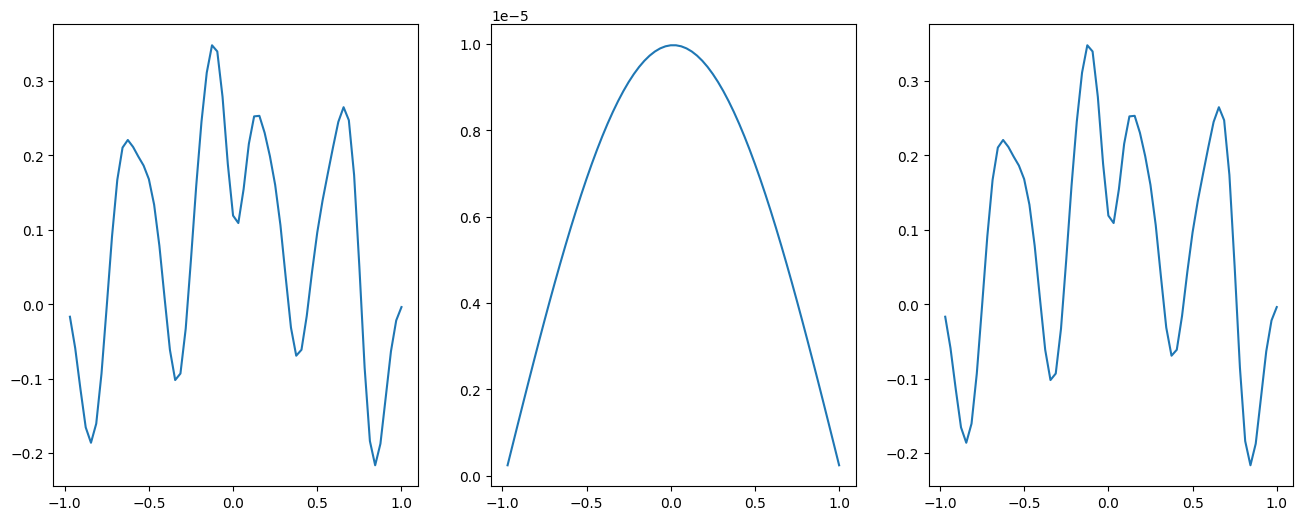

In [278]:
fig,(ax1,ax2,ax3)  = plt.subplots(1,3,figsize = (16,6))

tt = np.array(tt)
hfels = np.array(Hfe_final)
hbels = np.array(Hbe_final)
hfels = np.array(Hfe_final)

filt = [i%100 == 0 for i in range(len(tt))]
ax1.plot(x,Hvn )
ax2.plot(x,Hben)
ax3.plot(x,Hfen)

## Part 3

In [279]:



# Parameters
a = -1
b = 1
N = 1000
L = b - a
h = L / N
x = a + h * np.arange(1, N + 1)
k = np.arange(1, N + 1) * np.pi / L
lam =  (f_1*k*np.pi*2)**2
Hv_final = list()
Hbe_final = list()
Hfe_final = list()

Hv_loc = list()
Hbe_loc = list()
Hfe_loc = list()
# Functions
strike_x = 0.1 * L  # Place where string is plucked
strike_Amp = 0.5  # How much the string is plucked

# Initial position function
def h0(x):
    return strike_Amp * (
(x < strike_x) * (x / strike_x) +
        (x > strike_x) * ((L - x) / (L - strike_x)))


# Frequency domain variables
kk = np.fft.fftfreq(N, d=h) * N
kk2 = np.fft.fftfreq(N, d=h) * N


dstn = lambda f: dst(f, type=2, norm='ortho')
idstn = lambda f: idst(f, type=2, norm='ortho')
# Compute numerical second derivative using DST and plot

Av_k = dstn(h0(x))
Abe_k = dstn(h0(x))
Afe_k = dstn(h0(x))

Vv_k = 0 * Av_k
Vbe_k =  0 * Abe_k
Vfe_k =  0 * Afe_k

tt = np.linspace(0,tmax,int(tmax//dt)+1)
for i in range(int(tmax//dt)):
    Vv_k = -1*lam * Av_k*dt+ Vv_k
    Av_k += Vv_k*dt
    Abe_temp = Abe_k
    Afe_temp = Afe_k
    Vfe_k += dt*-lam*Afe_temp
    Afe_k += dt*Vfe_k

    Abe_k = (Abe_k + dt*Vbe_k)/(1+dt**2*lam)
    Vbe_k = -1*lam * Abe_k*dt+ Vbe_k

    # raise Exception()
    # Abe_k = np.linalg.solve(np.eye(len(Abe_k)) + dt**2*np.diag(lam), dt* Vbe_k + Abe_k)
    # Vbe_k = np.linalg.solve(np.eye(len(Abe_temp)) + dt**2*np.diag(lam), Vbe_k - lam*dt*Abe_temp)

    # Hn = np.sum(idstn(Av_k*np.sin(k*np.pi*(x/L))))
    Hvn = idstn(Av_k)
    Hben = idstn(Abe_k)
    Hfen = idstn(Afe_k)

    Hv_final.append(Hvn[40])
    Hbe_final.append(Hben[40])
    Hfe_final.append(Hfen[40])
    if tt[i] % .1 <.00001:
        print('hi')
        Hv_loc.append(Hvn)
        Hbe_loc.append(Hben)
        Hfe_loc.append(Hfen)  
    

    


hi


C:\Users\andyh\AppData\Local\Temp\ipykernel_17496\4253042012.py:47: RuntimeWarning: overflow encountered in multiply
  Vv_k = -1*lam * Av_k*dt+ Vv_k
C:\Users\andyh\AppData\Local\Temp\ipykernel_17496\4253042012.py:47: RuntimeWarning: invalid value encountered in add
  Vv_k = -1*lam * Av_k*dt+ Vv_k
C:\Users\andyh\AppData\Local\Temp\ipykernel_17496\4253042012.py:51: RuntimeWarning: overflow encountered in multiply
  Vfe_k += dt*-lam*Afe_temp
C:\Users\andyh\AppData\Local\Temp\ipykernel_17496\4253042012.py:51: RuntimeWarning: invalid value encountered in add
  Vfe_k += dt*-lam*Afe_temp


hi
hi
hi
hi
hi
hi
hi
hi
hi


In [280]:
Tfinal = 1  # Total duration in seconds
# Compute the sampling rate
Samp_rate = len(Hv_final) / Tfinal

# Play the sound with automatic scaling (normalize the signal)
sd.play(Hv_final , samplerate=int(Samp_rate))
sd.wait()

Tfinal = 1  # Total duration in seconds
# Compute the sampling rate
Samp_rate = len(Hfe_final) / Tfinal

# Play the sound with automatic scaling (normalize the signal)
sd.play(Hfe_final , samplerate=int(Samp_rate))
sd.wait()

Tfinal = 1  # Total duration in seconds
# Compute the sampling rate
Samp_rate = len(Hbe_final) / Tfinal

# Play the sound with automatic scaling (normalize the signal)
sd.play(Hbe_final , samplerate=int(Samp_rate))
sd.wait()

c:\Users\andyh\AppData\Local\Programs\Python\Python310\lib\site-packages\sounddevice.py:2598: RuntimeWarning: overflow encountered in cast
  outdata[:self.blocksize, self.output_mapping] = \


IndexError: boolean index did not match indexed array along dimension 0; dimension is 99999 but corresponding boolean dimension is 100000

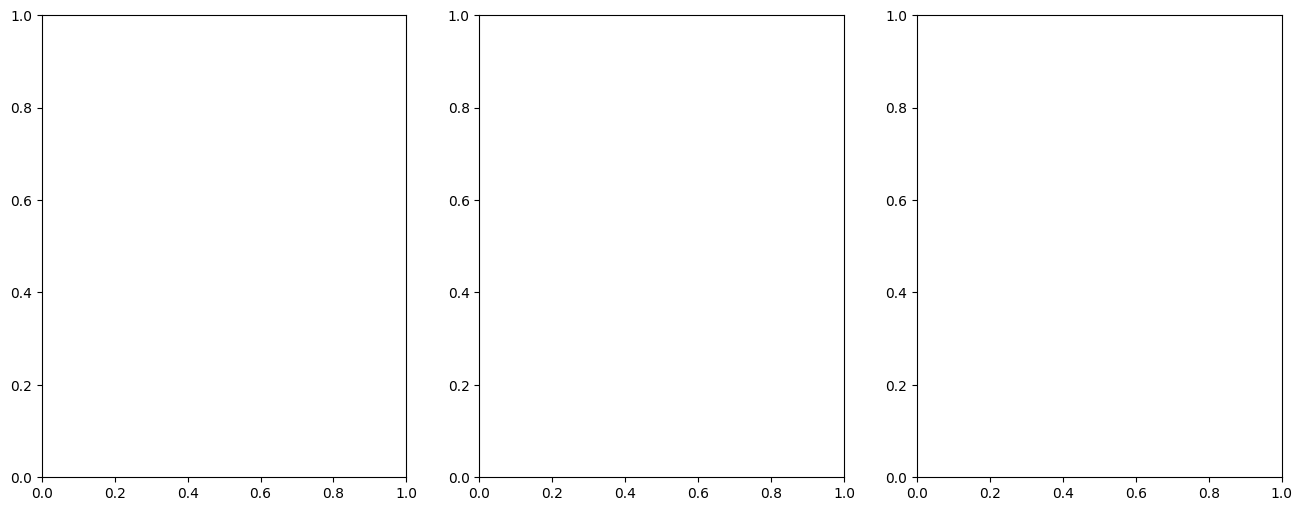

In [281]:
fig,(ax1,ax2,ax3)  = plt.subplots(1,3,figsize = (16,6))

tt = np.array(tt)
hfels = np.array(Hfe_final)
hbels = np.array(Hbe_final)
hfels = np.array(Hfe_final)

filt = [i%100 == 0 for i in range(len(tt))]
ax1.plot(tt[filt],hfels[filt])
ax2.plot(tt[filt],hbels[filt])
ax3.plot(tt[filt],hfels[filt])


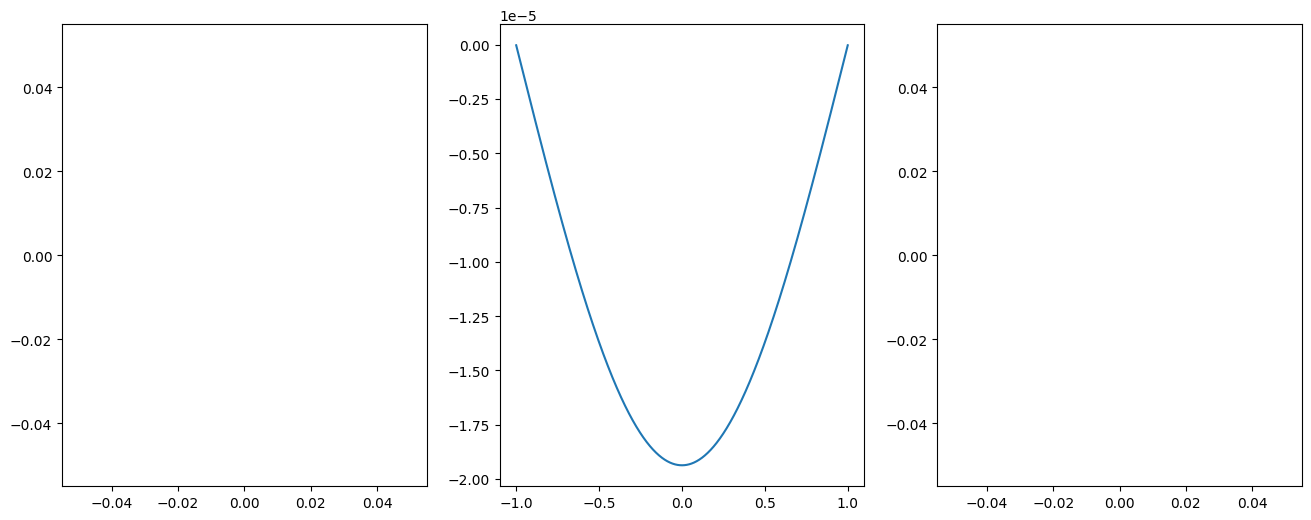

In [282]:
fig,(ax1,ax2,ax3)  = plt.subplots(1,3,figsize = (16,6))

tt = np.array(tt)
hfels = np.array(Hfe_final)
hbels = np.array(Hbe_final)
hfels = np.array(Hfe_final)

filt = [i%100 == 0 for i in range(len(tt))]
ax1.plot(x,Hvn )
ax2.plot(x,Hben)
ax3.plot(x,Hfen)

In [283]:
colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Olive
    '#17becf'   # Cyan
]

(-0.1, 0.1)

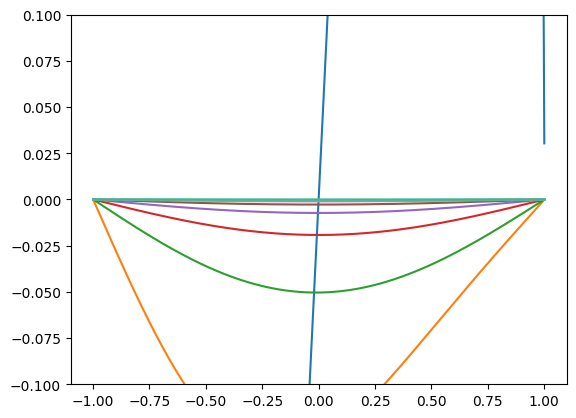

In [ ]:
fig, ax = plt.subplots()
 I wi
for i in range(len(Hv_loc)):
    ax.plot(x,Hbe_loc[i], color = colors[i])

    # ax.plot(x,dstn(h0(x)))
# ax.set_yscale('log')
ax.set_ylim(-.1,.1)

## Problem 3

In [284]:
f_1 = 174.5*123.5/98
dt = .00001
tmax = 1
damp = 1-.0005

In [285]:

def make_note(f_1,dt,tmax,damp):

    # Parameters
    a = -1
    b = 1
    N = 64
    L = b - a
    h = L / N
    x = a + h * np.arange(1, N + 1)
    k = np.arange(1, N + 1) * np.pi / L
    lam =  (f_1*k*np.pi*2)**2
    Hv_final = list()
    Hbe_final = list()
    Hfe_final = list()

    Hv_loc = list()
    Hbe_loc = list()
    Hfe_loc = list()
    # Functions
    strike_x = 0.1 * L  # Place where string is plucked
    strike_Amp = 0.5  # How much the string is plucked

    # Initial position function
    def h0(x):
        return strike_Amp * (
    (x < strike_x) * (x / strike_x) +
            (x > strike_x) * ((L - x) / (L - strike_x)))


    # Frequency domain variables
    kk = np.fft.fftfreq(N, d=h) * N
    kk2 = np.fft.fftfreq(N, d=h) * N


    dstn = lambda f: dst(f, type=2, norm='ortho')
    idstn = lambda f: idst(f, type=2, norm='ortho')
    # Compute numerical second derivative using DST and plot

    Av_k = dstn(h0(x))
    Abe_k = dstn(h0(x))
    Afe_k = dstn(h0(x))

    Vv_k = 0 * Av_k
    Vbe_k =  0 * Abe_k
    Vfe_k =  0 * Afe_k

    tt = np.linspace(0,tmax,int(tmax//dt)+1)
    for i in range(int(tmax//dt)):
        Vv_k = -1*lam * Av_k*dt+ Vv_k
        Av_k += Vv_k*dt
        Av_k *= damp
        Vv_k *= damp

        # Abe_temp = Abe_k
        # Afe_temp = Afe_k
        # Vfe_k += dt*-lam*Afe_temp
        # Vfe_k *= damp
        # Afe_k += dt*Vfe_k
        # Afe_k*= damp
        # Abe_k = (Abe_k + dt*Vbe_k)/(1+dt**2*lam)
        # Vbe_k = -1*lam * Abe_k*dt+ Vbe_k

        # raise Exception()
        # Abe_k = np.linalg.solve(np.eye(len(Abe_k)) + dt**2*np.diag(lam), dt* Vbe_k + Abe_k)
        # Vbe_k = np.linalg.solve(np.eye(len(Abe_temp)) + dt**2*np.diag(lam), Vbe_k - lam*dt*Abe_temp)

        # Hn = np.sum(idstn(Av_k*np.sin(k*np.pi*(x/L))))
        Hvn = idstn(Av_k)
        # Hben = idstn(Abe_k)
        # Hfen = idstn(Afe_k)

        Hv_final.append(Hvn[40])
        # Hbe_final.append(Hben[40])
        # Hfe_final.append(Hfen[40])
    return Hv_final


In [ ]:
Tfinal = 1  # Total duration in seconds
# Compute the sampling rate
Samp_rate = len(Hv_final) / Tfinal

# Play the sound with automatic scaling (normalize the signal)
sd.play(Hv_final , samplerate=int(Samp_rate))
sd.wait()

# Tfinal = 1  # Total duration in seconds
# # Compute the sampling rate
# Samp_rate = len(Hfe_final) / Tfinal

# # Play the sound with automatic scaling (normalize the signal)
# sd.play(Hfe_final , samplerate=int(Samp_rate))
# sd.wait()

# Tfinal = 1  # Total duration in seconds
# # Compute the sampling rate
# Samp_rate = len(Hbe_final) / Tfinal

# # Play the sound with automatic scaling (normalize the signal)
# sd.play(Hbe_final , samplerate=int(Samp_rate))
# sd.wait()

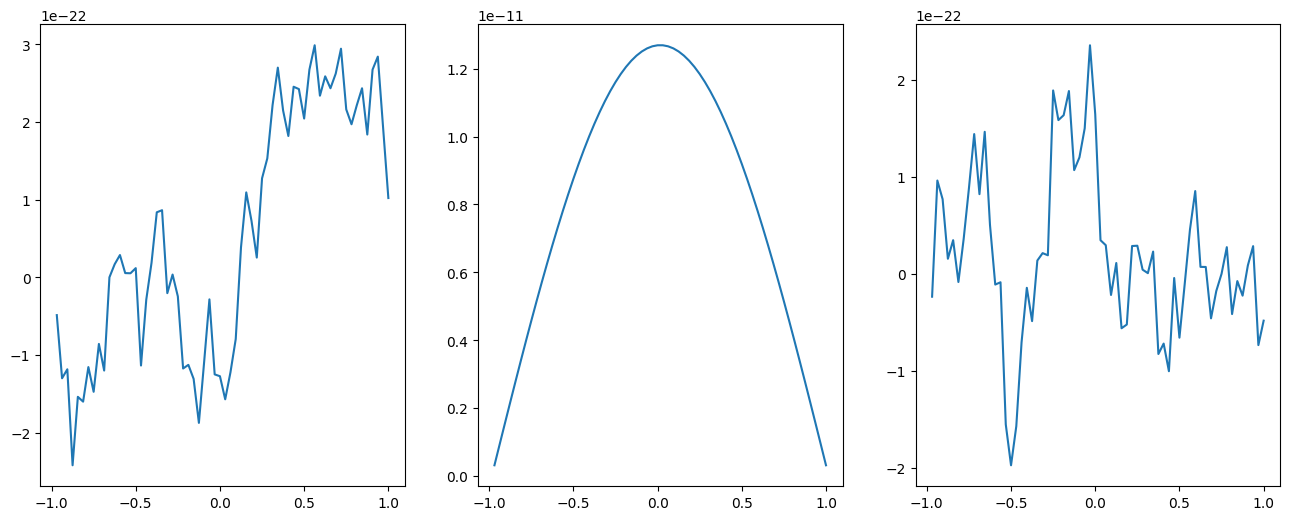

In [288]:
import time

In [286]:
# Frequencies for the notes in Hz
frequencies = [
    185.0, 185.0, 185.0, 233.08, 311.13, 311.13, 311.13, 277.18,  # F# F# F# A# D# D# D# C#
    233.08, 233.08, 233.08, 233.08,                                # A# A# A# A#
    174.61, 174.61, 174.61, 155.56                                # F F F D#
]
note_list = list()
for f in frequencies:
    note_list.append(make_note(f*123.5/98,.000007,1,1-.0005))
    note_list[-1] = note_list[-1][:len(note_list[-1])//5]

In [290]:
Tfinal = 1  # Total duration in seconds
# Compute the sampling rate
Samp_rate = len(note_list[0]) / (Tfinal/5)

# Play the sound with automatic scaling (normalize the signal)
for i in range(2):
    for note in note_list:
        sd.play(note , samplerate=int(Samp_rate))
        sd.wait()
        time.sleep(.1)

KeyboardInterrupt: 

In [ ]:


# Parameters
a = -1
b = 1
N = 64
L = b - a
h = L / N
x = a + h * np.arange(1, N + 1)
k = np.arange(1, N + 1) * np.pi / L
lam =  (f_1*k*np.pi*2)**2
Hv_final = list()
Hbe_final = list()
Hfe_final = list()
Hv_loc = list()
Hbe_loc = list()
Hfe_loc = list()
# Functions
strike_x = 0.1 * L  # Place where string is plucked
strike_Amp = 0.5  # How much the string is plucked
# Initial position function
def h0(x):
    return strike_Amp * (
(x < strike_x) * (x / strike_x) +
        (x > strike_x) * ((L - x) / (L - strike_x)))
# Frequency domain variables
kk = np.fft.fftfreq(N, d=h) * N
kk2 = np.fft.fftfreq(N, d=h) * N
dstn = lambda f: dst(f, type=2, norm='ortho')
idstn = lambda f: idst(f, type=2, norm='ortho')
# Compute numerical second derivative using DST and plot
Av_k = dstn(h0(x))
Abe_k = dstn(h0(x))
Afe_k = dstn(h0(x))
Vv_k = 0 * Av_k
Vbe_k =  0 * Abe_k
Vfe_k =  0 * Afe_k
tt = np.linspace(0,tmax,int(tmax//dt)+1)
for i in range(int(tmax//dt)):
    Vv_k = -1*lam * Av_k*dt+ Vv_k
    Av_k += Vv_k*dt
    Av_k *= damp
    Vv_k *= damp
    Abe_temp = Abe_k
    Afe_temp = Afe_k
    Vfe_k += dt*-lam*Afe_temp
    Afe_k += dt*Vfe_k
    Abe_k = (Abe_k + dt*Vbe_k)/(1+dt**2*lam)
    Vbe_k = -1*lam * Abe_k*dt+ Vbe_k

    Hn = np.sum(idstn(Av_k*np.sin(k*np.pi*(x/L))))
    Hvn = idstn(Av_k)
    Hben = idstn(Abe_k)
    Hfen = idstn(Afe_k)
    Hv_final.append(Hvn[40])
    Hbe_final.append(Hben[40])
    Hfe_final.append(Hfen[40])

tt = tt[0:-1]


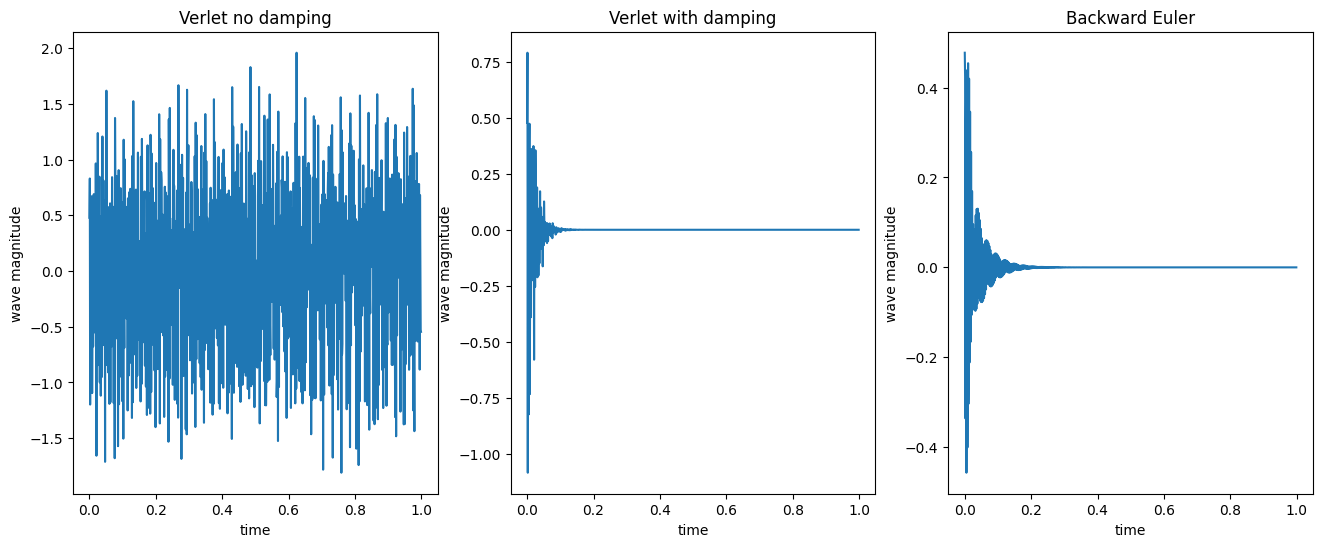

In [ ]:
fig,(ax1,ax2,ax3)  = plt.subplots(1,3,figsize = (16,6))

tt = np.array(tt)
hvels = np.array(Hv_final)
hbels = np.array(Hbe_final)
hfels = np.array(Hfe_final)

filt = [i%100 == 0 for i in range(len(tt))]
ax1.plot(tt[filt],hfels[filt])
ax1.set_xlabel('time')
ax1.set_ylabel('wave magnitude')
ax1.set_title('Verlet no damping')
ax2.set_xlabel('time')
ax2.set_ylabel('wave magnitude')
ax2.set_title('Verlet with damping')

ax3.set_xlabel('time')
ax3.set_ylabel('wave magnitude')
ax3.set_title('Backward Euler')

ax2.plot(tt[filt],hvels[filt])
ax3.plot(tt[filt],hbels[filt])
